# 1 Data Extraction and Cleaning

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Function for extracting one table

In [2]:
def extract_table(url):
    """
    extract_table finds a table from a given url and returns a dataframe with all informations.

    :param url: the url that the table is from (currently works for kicker.de)
    :return: dataframe with the corresponding table
    """ 
    
    # use beautiful soup
    page = requests.get(url) #200 is fine
    soup = BeautifulSoup(page.text, 'html')
    table = soup.find('table', class_='kick__table kick__table--ranking kick__table--alternate kick__table--resptabelle')

    # get titles
    titles = table.find_all('th')
    titles = [t.text.strip() for t in titles] #list comprehension
    titles
    
    # create new data frame
    df = pd.DataFrame(columns = titles) 
    
    # fill rows with data
    col_data = table.find_all('tr')
    for row in col_data[1:]:
        row_data = row.find_all('td')
        ind_row_data = [r.text.strip() for r in row_data]
        
        #insert in dataframe
        length = len(df)
        df.loc[length] = ind_row_data
    
    # add year to this table
    df['Year'] = url[-7:]
    return df

In [3]:
df = extract_table('https://www.kicker.de/bundesliga/tabelle/2000-01')
df

,Pl.,,,Team,Sp.,ss-u-n,U,N,Tore,Diff.,Punkte,Year
0,1,,,"Bayern (M, P)\nBayern München (M, P)",34,19-6-9\n19,6,9,62:37,25,63,2000-01
1,2,,,Schalke\nFC Schalke 04,34,18-8-8\n18,8,8,65:35,30,62,2000-01
2,3,,,Dortmund\nBorussia Dortmund,34,16-10-8\n16,10,8,62:42,20,58,2000-01
3,4,,,Leverkusen\nBayer 04 Leverkusen,34,17-6-11\n17,6,11,54:40,14,57,2000-01
4,5,,,Hertha\nHertha BSC,34,18-2-14\n18,2,14,58:52,6,56,2000-01
5,6,,,Freiburg\nSC Freiburg,34,15-10-9\n15,10,9,54:37,17,55,2000-01
6,7,,,Bremen\nWerder Bremen,34,15-8-11\n15,8,11,53:48,5,53,2000-01
7,8,,,K'lautern\n1. FC Kaiserslautern,34,15-5-14\n15,5,14,49:54,-5,50,2000-01
8,9,,,Wolfsburg\nVfL Wolfsburg,34,12-11-11\n12,11,11,60:45,15,47,2000-01
9,10,,,Köln (N)\n1. FC Köln (N),34,12-10-12\n12,10,12,59:52,7,46,2000-01


## Function for cleaning one table

In [4]:
def clean_table(df):
    """
    clean_table gets a dataframe for one season and returns a new dataframe with changed titles and cleaned data .

    :param df: the dataframe for one specific season
    :return: dataframe with changed titles and cleaned data
    """ 
    
    # rename columns
    df.rename(columns={'Pl.': 'Platz', 'Sp.': 'Spiele','ss-u-n': 'S', 'Diff.': 'Diff'}, inplace=True)
    #df = df.drop('', axis=1)
    
    # clean columns with dirty data
    df['Team'] = df['Team'].str.split('\n').str[1].replace(r'\([^)]*\)', '', regex=True).str.strip()
    df['S'] = df['S'].str.split('\n').str[1].astype(int)
    
    # split goal difference column into two seperate for goals and goals against
    df['G'] = df['Tore'].str.split(':').str[0].astype(int)
    df['A'] = df['Tore'].str.split(':').str[1].astype(int)
    df.insert(9, 'G', df.pop('G'))
    df.insert(10, 'A', df.pop('A'))
    
    # make sure data types are correct
    df['Platz'] = df['Platz'].astype(int)
    df['Spiele'] = df['Spiele'].astype(int)
    df['U'] = df['U'].astype(int)
    df['N'] = df['N'].astype(int)
    df['Diff'] = df['Diff'].astype(int)
    df['Punkte'] = df['Punkte'].astype(int)
    df['U'] = df['U'].astype(int)

    return df

In [5]:
df = clean_table(df)
df

,Platz,,,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
0,1,,,Bayern München,34,19,6,9,62:37,62,37,25,63,2000-01
1,2,,,FC Schalke 04,34,18,8,8,65:35,65,35,30,62,2000-01
2,3,,,Borussia Dortmund,34,16,10,8,62:42,62,42,20,58,2000-01
3,4,,,Bayer 04 Leverkusen,34,17,6,11,54:40,54,40,14,57,2000-01
4,5,,,Hertha BSC,34,18,2,14,58:52,58,52,6,56,2000-01
5,6,,,SC Freiburg,34,15,10,9,54:37,54,37,17,55,2000-01
6,7,,,Werder Bremen,34,15,8,11,53:48,53,48,5,53,2000-01
7,8,,,1. FC Kaiserslautern,34,15,5,14,49:54,49,54,-5,50,2000-01
8,9,,,VfL Wolfsburg,34,12,11,11,60:45,60,45,15,47,2000-01
9,10,,,1. FC Köln,34,12,10,12,59:52,59,52,7,46,2000-01


## Combining all tables into one big dataframe

In [6]:
# iterate over all seasons from 2000/2001 to 2023/2024 and combine them into one big dataframe
for i in range (1, 24):
    url = 'https://www.kicker.de/bundesliga/tabelle/20' + "{:02d}".format(i) + '-' + "{:02d}".format(i+1)
    df_temp = extract_table(url)    
    df_temp = clean_table(df_temp)
    df = pd.concat([df, df_temp])
    
# reset index by calculating a new one and delete the old ones
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.drop(columns=df.columns[[1, 2]], inplace=True)
df.to_csv(r'/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesliga.csv', index=True)
df

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
0,1,Bayern München,34,19,6,9,62:37,62,37,25,63,2000-01
1,2,FC Schalke 04,34,18,8,8,65:35,65,35,30,62,2000-01
2,3,Borussia Dortmund,34,16,10,8,62:42,62,42,20,58,2000-01
3,4,Bayer 04 Leverkusen,34,17,6,11,54:40,54,40,14,57,2000-01
4,5,Hertha BSC,34,18,2,14,58:52,58,52,6,56,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...
427,14,VfL Bochum,21,4,10,7,23:39,23,39,-16,22,2023-24
428,15,1. FC Union Berlin,21,6,3,12,20:35,20,35,-15,21,2023-24
429,16,1. FC Köln,21,3,7,11,15:35,15,35,-20,16,2023-24
430,17,1. FSV Mainz 05,21,1,9,11,16:35,16,35,-19,12,2023-24


# 2 Data Validation

## Checking for missing values

In [7]:
missing_values = df.isnull().sum()
missing_values.sum()

0

## Check for duplicate values 

In [8]:
df[df.duplicated()].shape[0]

0

## Checking for wrong values

In [9]:
# Check if the Goal difference is calculated correctly
(df['G'] - df['A'] == df['Diff']).value_counts()

True    432
Name: count, dtype: int64

In [10]:
# Check if the number of points is calculated correctly
wrong_points = (df['S'] * 3 + df['U'] != df['Punkte'])
df[wrong_points]
# Contextual check, this team were deducted 3 points, so no error in the data: https://media.dfl.de/sites/2/2018/11/2003_Pressemitteilung-20-28.03.2003.pdf

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
68,15,1. FC Kaiserslautern *,34,11,6,17,39:62,39,62,-23,36,2003-04


In [11]:
# Check if all team names are correct
df.loc[df['Team'] == '1. FC Kaiserslautern *', 'Team'] = '1. FC Kaiserslautern'
df['Team'].unique()

array(['Bayern München', 'FC Schalke 04', 'Borussia Dortmund',
       'Bayer 04 Leverkusen', 'Hertha BSC', 'SC Freiburg',
       'Werder Bremen', '1. FC Kaiserslautern', 'VfL Wolfsburg',
       '1. FC Köln', 'TSV 1860 München', 'Hansa Rostock', 'Hamburger SV',
       'Energie Cottbus', 'VfB Stuttgart', 'SpVgg Unterhaching',
       'Eintracht Frankfurt', 'VfL Bochum', 'Bor. Mönchengladbach',
       '1. FC Nürnberg', 'FC St. Pauli', 'Hannover 96',
       'Arminia Bielefeld', '1. FSV Mainz 05', 'MSV Duisburg',
       'Alemannia Aachen', 'Karlsruher SC', 'TSG Hoffenheim',
       'FC Augsburg', 'Fortuna Düsseldorf', 'SpVgg Greuther Fürth',
       'Eintracht Braunschweig', 'SC Paderborn 07', 'FC Ingolstadt 04',
       'SV Darmstadt 98', 'RB Leipzig', '1. FC Union Berlin',
       '1. FC Heidenheim'], dtype=object)

In [12]:
# Check if each placement is occuring the same amount
df['Platz'].value_counts().unique()

array([24])

# 3 Exploratory Data Analysis

### Question: Which was the highest amount of points, draws and goals against in a single season?

In [13]:
# most points
df[df['Punkte'] == df['Punkte'].max()]

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
216,1,Bayern München,34,29,4,1,98:18,98,18,80,91,2012-13


In [14]:
# most draws
df[df['U'] == df['U'].max()]

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
101,12,Hannover 96,34,7,17,10,43:47,43,47,-4,38,2005-06


In [15]:
# most goals against
df[df['A'] == df['A'].max()]

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
377,18,FC Schalke 04,34,3,7,24,25:86,25,86,-61,16,2020-21


### Question: What is the correlation matrix?

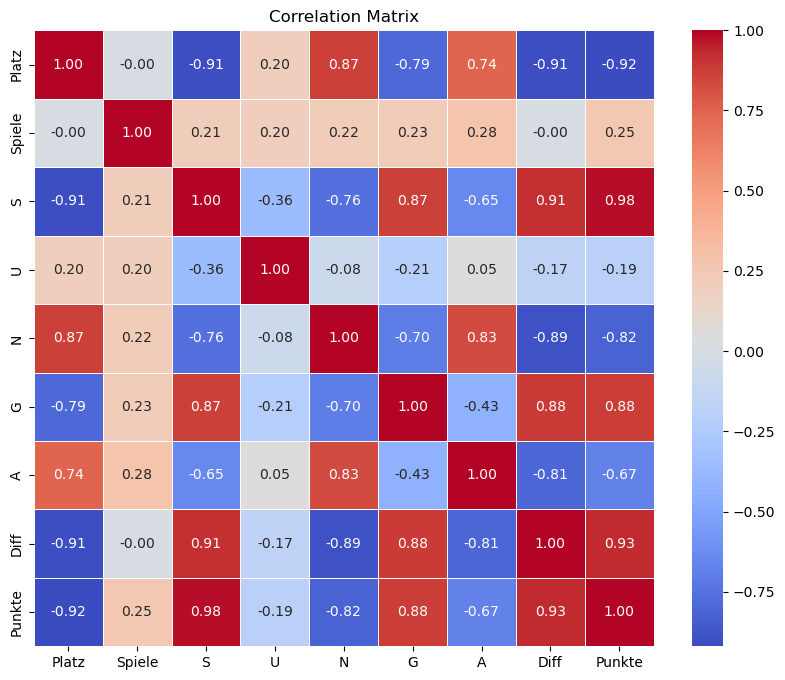

In [16]:
temp = df.drop(columns=['Team', 'Tore', 'Year'])
correlation_matrix = temp.corr()

# Heatmap mit Seaborn erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

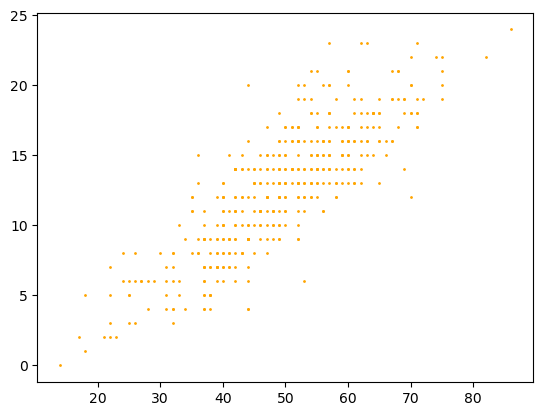

In [17]:
# check correlation between Goals Against and Loses
plt.scatter(temp['A'], temp['N'], marker='o', color='orange', s=1)

### Question: What was the minimum/maximum amount of points that a team did not get relegated with? 

In [18]:
# minimum amount of points which did get relegated
temp = df[(df['Platz'] == 15) & (df['Spiele'] == 34)]
temp.nsmallest(1, 'Punkte')

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
158,15,Bor. Mönchengladbach,34,8,7,19,39:62,39,62,-23,31,2008-09


In [19]:
# maximum amount which did not get relegated
temp.nlargest(1, 'Punkte')

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year
50,15,Bayer 04 Leverkusen,34,11,7,16,47:56,47,56,-9,40,2002-03


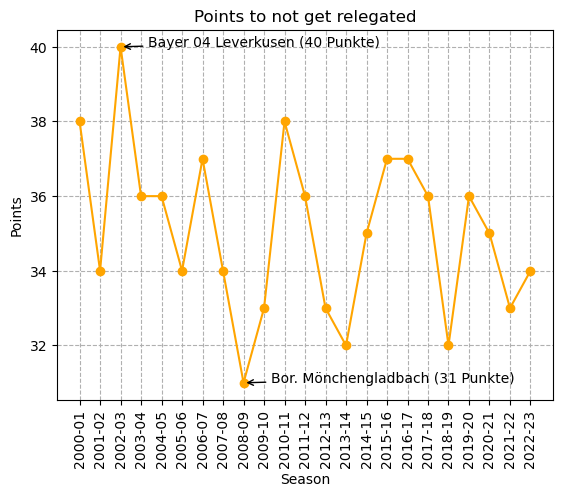

In [20]:
# Visualisation
# Create plot
plt.plot(temp['Year'], temp['Punkte'], marker='o', color='orange')

# Find the minimum and maximum points
min_point = temp.loc[temp['Punkte'].idxmin()]
max_point = temp.loc[temp['Punkte'].idxmax()]

# Annotate the minimum point
plt.annotate(f"{min_point['Team']} ({min_point['Punkte']} Punkte)",
             xy=(min_point['Year'], min_point['Punkte']),
             xytext=(20, 0),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

# Annotate the maximum point
plt.annotate(f"{max_point['Team']} ({max_point['Punkte']} Punkte)",
             xy=(max_point['Year'], max_point['Punkte']),
             xytext=(20, 0),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

# Axes
plt.xlabel('Season')
plt.xticks(rotation=90)
plt.ylabel('Points')
plt.grid(True, linestyle='--')
plt.title('Points to not get relegated')

# Show plot
plt.show()

### Question: What is the combined table from the year 2000 on?

In [21]:
combined = df.groupby('Team').agg({'Spiele':'sum', 'S':'sum', 'U':'sum', 'N':'sum', 'Punkte':'sum','G':'sum', 'A':'sum', 'Diff':'sum', 'Year':'count'})
combined.sort_values('Punkte', ascending = False).head()

,Spiele,S,U,N,Punkte,G,A,Diff,Year
Team,,,,,,,,,
Bayern München,803,548,143,112,1787,1901,718,1183,24
Borussia Dortmund,803,425,192,186,1467,1555,963,592,24
Bayer 04 Leverkusen,803,392,181,230,1357,1460,1028,432,24
FC Schalke 04,748,319,184,245,1141,1082,977,105,22
VfL Wolfsburg,803,306,203,294,1121,1218,1158,60,24


# 4 Linear Regression

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

### Question: How many points can you expect in a season if you score x goals?

In [23]:
goals = input()

50


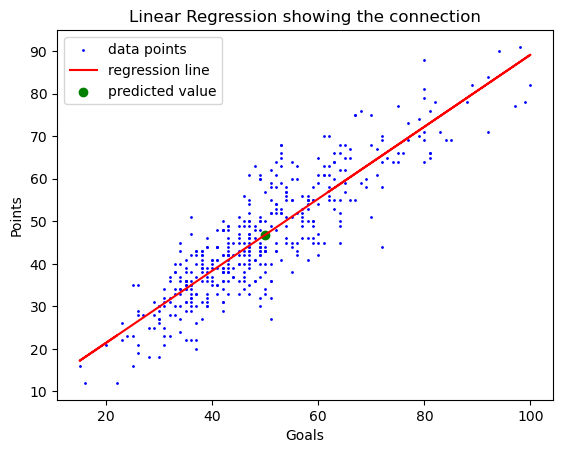

A team scoring 50 goals can expect 47 points


In [24]:
X = df['G'].values.reshape(-1, 1)
Y = df['Punkte'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)

new_data = np.array([[int(goals)]])  
prediction = model.predict(new_data)

plt.scatter(X, Y, color='blue', label='data points', s=1)
plt.plot(X, model.predict(X), color='red', label='regression line')
plt.scatter(new_data, prediction, color='green', label='predicted value')
plt.xlabel('Goals')
plt.ylabel('Points')
plt.title('Linear Regression showing the connection')
plt.legend()
plt.show()

print('A team scoring ' + goals + ' goals can expect ' + str(round(prediction.flatten()[0])) + ' points')

In [25]:
df[df['G'] == int(goals)].describe()['Punkte']

count    11.000000
mean     42.818182
std       6.853002
min      33.000000
25%      39.000000
50%      43.000000
75%      45.000000
max      57.000000
Name: Punkte, dtype: float64

# 5 Combining multiple data sources

In [26]:
from fuzzywuzzy import process

def match_probability(name1, name_list):
    """
    match_probability finds the name of the best match from another table, given a team name.

    :param name1: name of the team 
    :param name_list: list of candidate names
    :return: team name of best match
    """ 
    matches = process.extractOne(name1, name_list)
    return matches[0]

# new website with salary information but with englisch team names
url = 'https://fbref.com/de/wettbewerbe/20/wages/Bundesliga-Gehalter'
df2 = pd.read_html(url)[0]
df2['Wochengehälter'] = df2['Wochengehälter'].str.split('(').str[0].str.split().str[1].str.replace('.', '').astype(int)
df2['Jahresgehälter'] = df2['Jahresgehälter'].str.split('(').str[0].str.split().str[1].str.replace('.', '').astype(int)
df2.to_csv(r'/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesligaSalary.csv', index=True)


/Users/enricokoegler/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [27]:
# create copy of the current season table
df1 = df[df['Year'] == '2023-24'].copy()
df1.to_csv(r'/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesliga2023-24.csv', index=True)
with open('/Users/enricokoegler/Desktop/Data Analysis Bootcamp/Python/Bundesliga/bundesliga.html', 'w') as file:
    file.write(df1.to_html())

# for each team find the salary information by fuzzy matching
for index, row in df1.iterrows():
    name = match_probability(row['Team'], df2['Verein'])
    salary = df2[df2['Verein'] == name]['Jahresgehälter'].values[0] 
    df1.loc[index, 'Gehalt'] = salary    
    
df1['Gehalt'] = df1['Gehalt'] /1000000
df1.sort_values('Gehalt', ascending=False)

,Platz,Team,Spiele,S,U,N,Tore,G,A,Diff,Punkte,Year,Gehalt
415,2,Bayern München,21,16,2,3,59:22,59,22,37,50,2023-24,257.32
417,4,Borussia Dortmund,21,11,7,3,43:26,43,26,17,40,2023-24,126.60
418,5,RB Leipzig,21,11,4,6,46:28,46,28,18,37,2023-24,101.04
414,1,Bayer 04 Leverkusen,21,17,4,0,55:14,55,14,41,55,2023-24,62.37
425,12,VfL Wolfsburg,21,6,5,10,25:33,25,33,-8,23,2023-24,54.83
426,13,Bor. Mönchengladbach,21,5,7,9,36:41,36,41,-5,22,2023-24,51.48
421,8,TSG Hoffenheim,21,7,6,8,38:40,38,40,-2,27,2023-24,48.59
419,6,Eintracht Frankfurt,21,8,8,5,31:25,31,25,6,32,2023-24,36.33
428,15,1. FC Union Berlin,21,6,3,12,20:35,20,35,-15,21,2023-24,35.02
423,10,Werder Bremen,21,7,5,9,30:34,30,34,-4,26,2023-24,28.78


### Question: What team spends the most amount of money per point (in terms of salary)?

In [28]:
temp = df1.copy()
temp['Gehalt/Punkte'] = temp['Gehalt'] / temp['Punkte']
temp[['Team', 'Punkte', 'Gehalt', 'Gehalt/Punkte']].sort_values('Gehalt/Punkte', ascending=False)
# salary is in Mio. €

,Team,Punkte,Gehalt,Gehalt/Punkte
415,Bayern München,50,257.32,5.146400
417,Borussia Dortmund,40,126.60,3.165000
418,RB Leipzig,37,101.04,2.730811
425,VfL Wolfsburg,23,54.83,2.383913
430,1. FSV Mainz 05,12,28.54,2.378333
426,Bor. Mönchengladbach,22,51.48,2.340000
421,TSG Hoffenheim,27,48.59,1.799630
428,1. FC Union Berlin,21,35.02,1.667619
429,1. FC Köln,16,21.88,1.367500
419,Eintracht Frankfurt,32,36.33,1.135312
